In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from scipy import stats
from scipy.stats import randint
from datetime import datetime 



In [2]:
df = pd.read_csv("/Users/yuxin/Documents/Data Testing/COVID-19/NYTIME.StateCounty/usstates.csv", parse_dates = ['date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 5 columns):
date      1386 non-null datetime64[ns]
state     1386 non-null object
fips      1386 non-null int64
cases     1386 non-null int64
deaths    1386 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 54.3+ KB


In [4]:
df.isna().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [5]:
# This data contains 54 unique states
df.describe(include = 'object')

,state
count,1386
unique,54
top,Washington
freq,67


In [6]:
# The highest number of confirmed cases is 44635 and deaths number is 535.
df.describe()

,fips,cases,deaths
count,1386.000000,1386.000000,1386.000000
mean,30.349928,344.105339,5.204185
std,17.692220,2158.829201,25.836716
min,1.000000,1.000000,0.000000
25%,17.000000,3.000000,0.000000
50%,30.000000,21.000000,0.000000
75%,45.000000,122.500000,1.000000
max,78.000000,44635.000000,535.000000


In [7]:
# This data contains informaiton across 2020-01-21 to 2020-03-27
a = df.date.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-21 00:00:00
The last date is: 2020-03-27 00:00:00


In [11]:
# Confirmed and Deaths cases by States
top = df[df['date'] == df['date'].max()]
States = top.groupby('state')['cases','deaths'].sum().reset_index()
States

,state,cases,deaths
0,Alabama,639,4
1,Alaska,85,1
2,Arizona,665,15
3,Arkansas,386,3
4,California,4914,102
5,Colorado,1735,31
6,Connecticut,1291,27
7,Delaware,165,2
8,District of Columbia,304,4
9,Florida,3198,46


[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

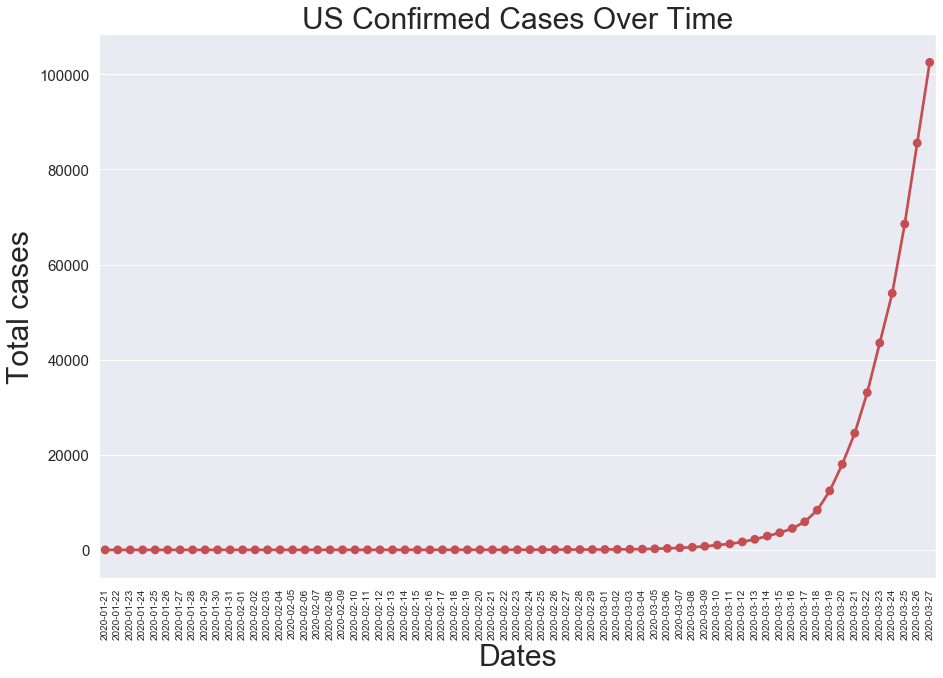

In [10]:
# Plot confirmed cases in the US. 
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Dates",fontsize = 30)
plt.ylabel('Total cases',fontsize = 30)
plt.title("US Confirmed Cases Over Time" , fontsize = 30)
total_cases = df.groupby('date')['date', 'cases'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot( x = total_cases.date.dt.date ,y = total_cases.cases , color = 'r')
ax.set(xlabel='Dates', ylabel='Total cases')

In [12]:
# Top 10 states have the most confirmed cases
top = df[df['date'] == df['date'].max()]
top_states = top.groupby(by = 'state')['cases'].sum().sort_values(ascending = False).head(10).reset_index()
top_states

,state,cases
0,New York,44635
1,New Jersey,8825
2,California,4914
3,Washington,3770
4,Michigan,3657
5,Massachusetts,3240
6,Florida,3198
7,Illinois,3029
8,Louisiana,2746
9,Pennsylvania,2218


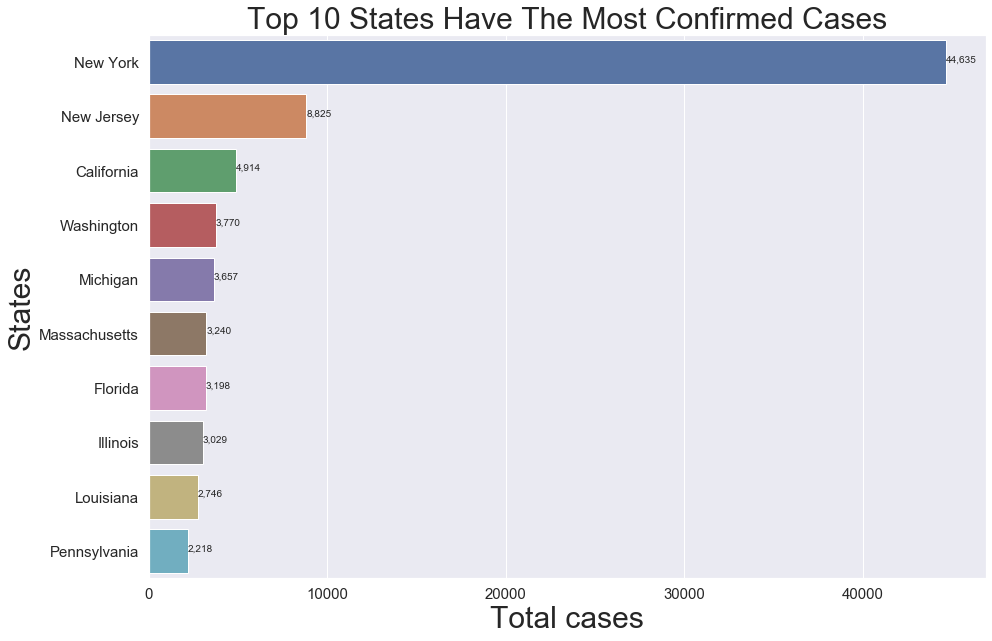

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Confirmed Cases",fontsize = 30)
plt.ylabel('States',fontsize = 30)
plt.title("Top 10 States Have The Most Confirmed Cases" , fontsize = 30)
ax = sns.barplot(x = top_states.cases, y = top_states.state)
for i, (value, name) in enumerate(zip(top_states.cases,top_states.state)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='States')
plt.show()

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

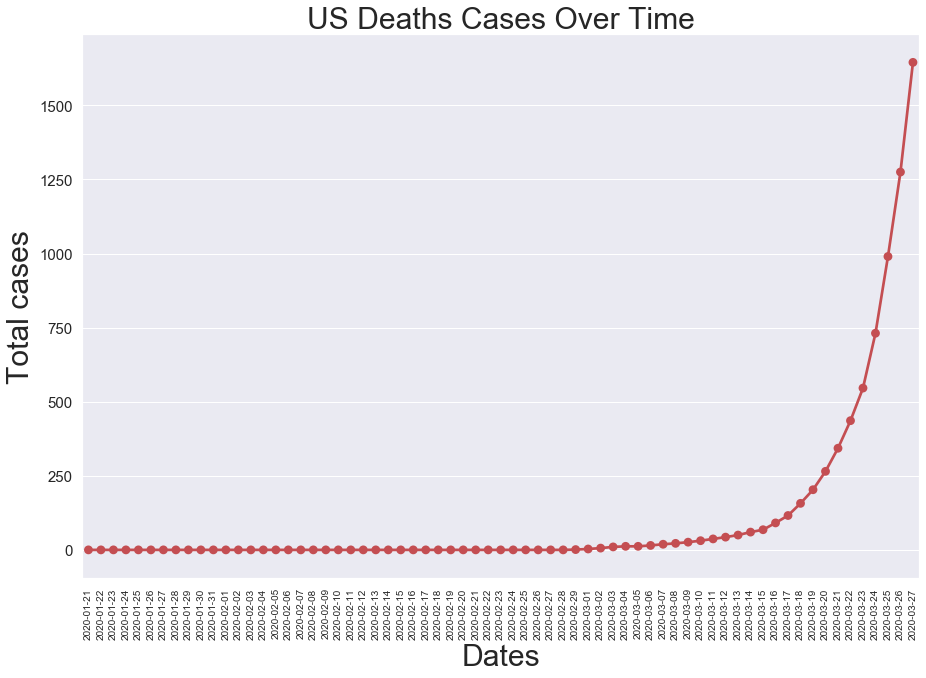

In [14]:
# Plot deaths cases in the US. 
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel("Dates",fontsize = 30)
plt.ylabel('Total cases',fontsize = 30)
plt.title("US Deaths Cases Over Time" , fontsize = 30)
total_cases = df.groupby('date')['date', 'deaths'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot( x = total_cases.date.dt.date ,y = total_cases.deaths, color = 'r')
ax.set(xlabel='Dates', ylabel='Total cases')

In [15]:
# Top 10 states have the most confirmed cases
top = df[df['date'] == df['date'].max()]
top_statesd = top.groupby(by = 'state')['deaths'].sum().sort_values(ascending = False).head(10).reset_index()
top_statesd

,state,deaths
0,New York,535
1,Washington,177
2,Louisiana,119
3,New Jersey,108
4,California,102
5,Michigan,93
6,Georgia,64
7,Florida,46
8,Illinois,37
9,Massachusetts,35


[Text(0, 0.5, 'States'), Text(0.5, 0, 'Total cases')]

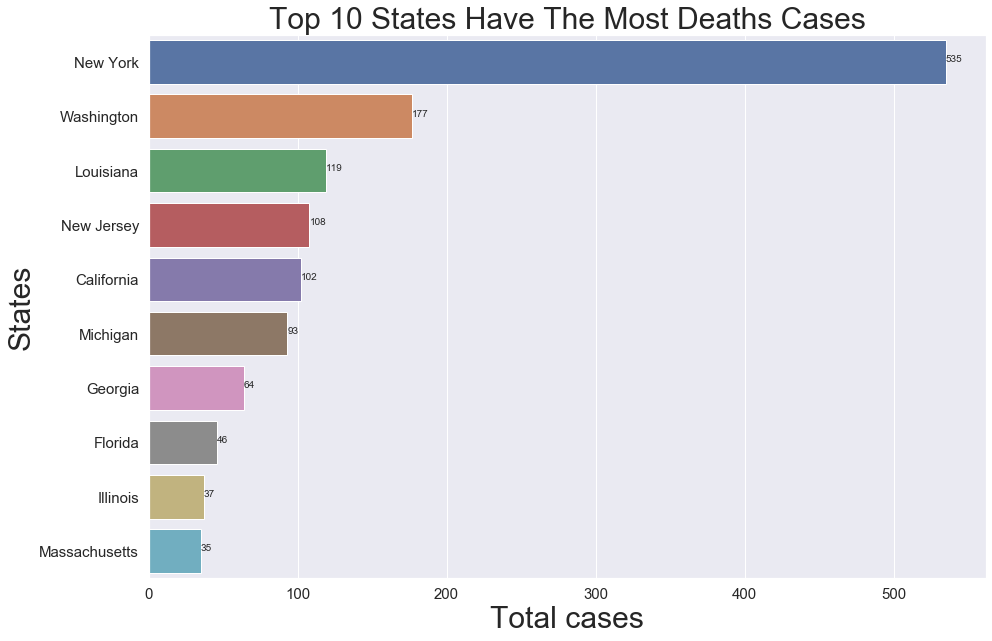

In [18]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Deaths Cases",fontsize = 30)
plt.ylabel('States',fontsize = 30)
plt.title("Top 10 States Have The Most Deaths Cases" , fontsize = 30)
ax = sns.barplot(x = top_statesd.deaths, y = top_statesd.state)
for i, (value, name) in enumerate(zip(top_statesd.deaths,top_statesd.state)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='States')

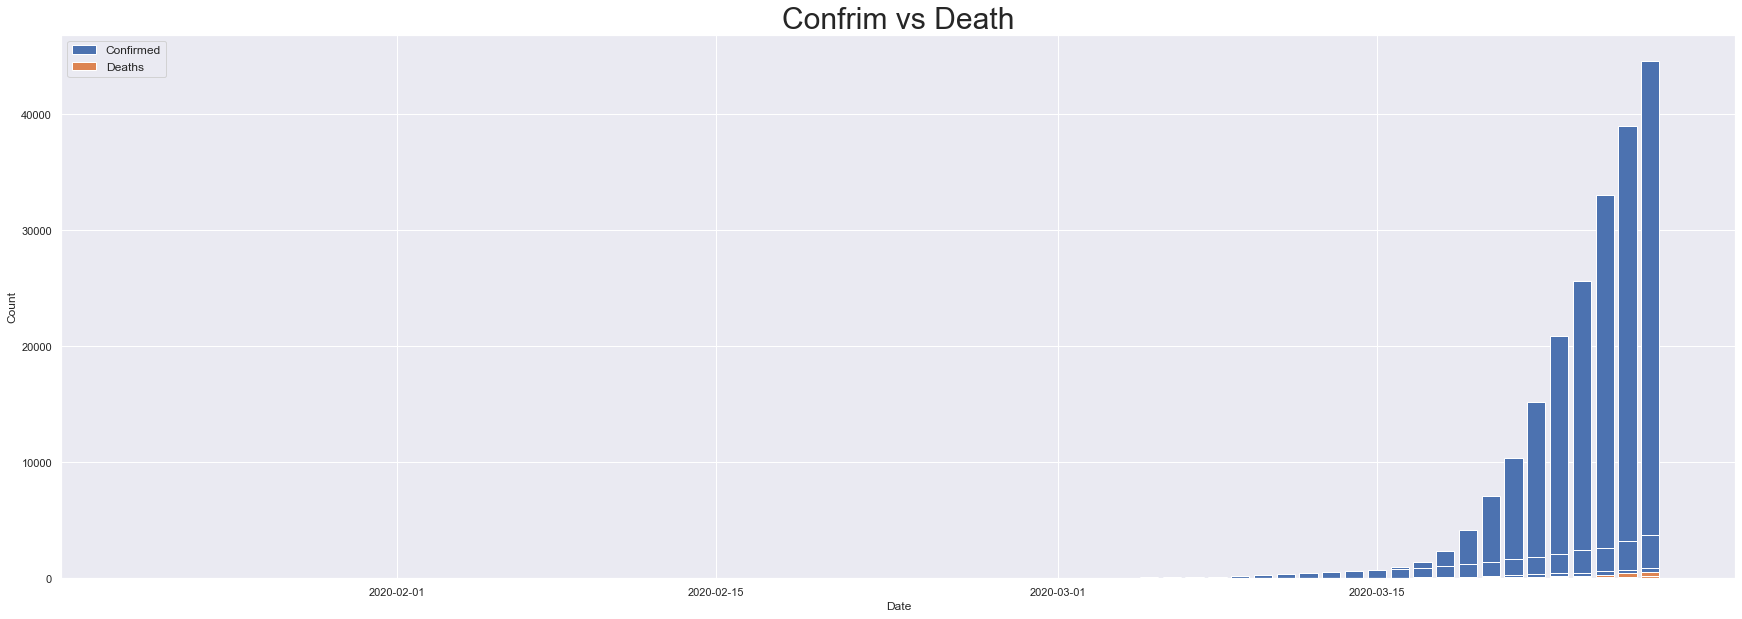

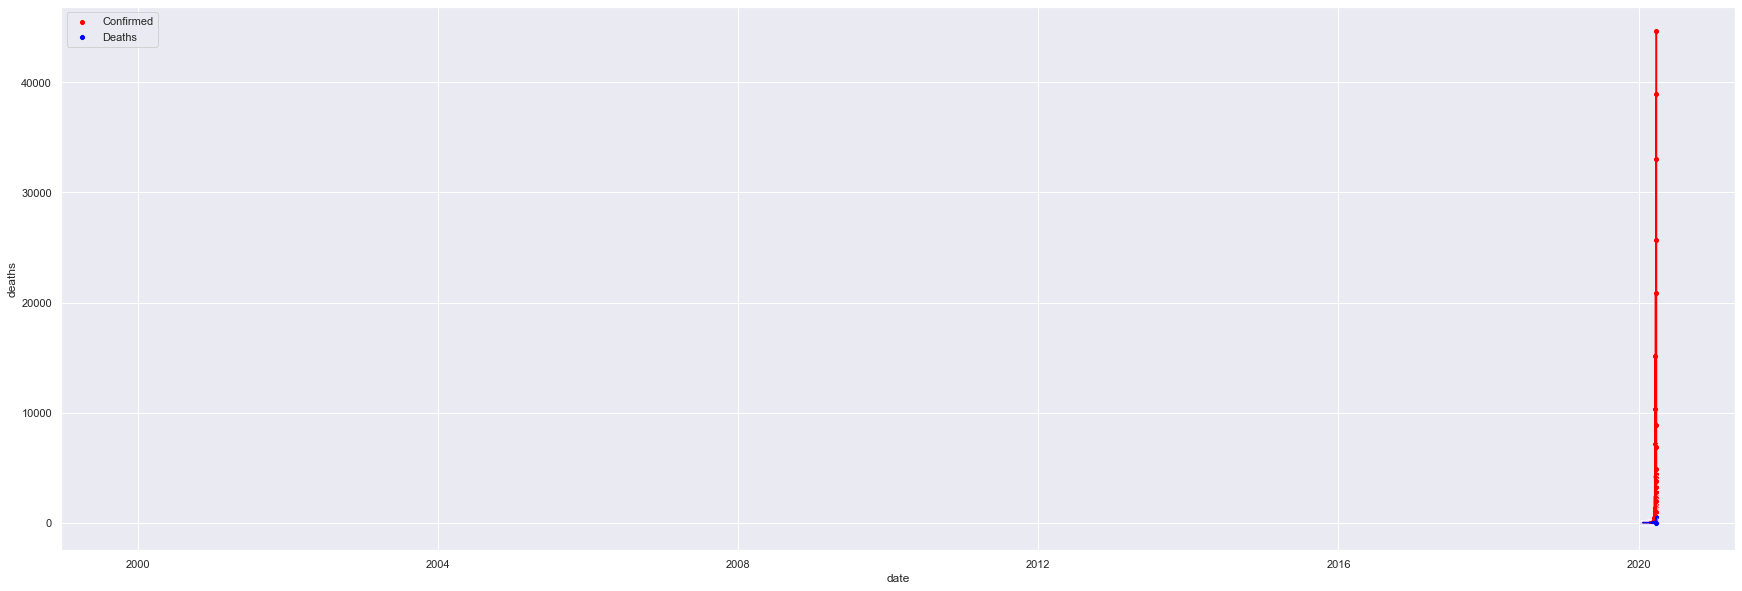

In [22]:
# Time series Analysis Compare Confirmed vs Deaths Cases

plt.figure(figsize=(30,10))
plt.bar(df.date, df.cases,label="Confirmed")
plt.bar(df.date, df.deaths,label="Deaths")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(30,10))
ax=sns.scatterplot(x="date", y="cases", data=df,
             color="red",label = "Confirmed")
ax=sns.scatterplot(x="date", y="deaths", data=df,
             color="blue",label = "Deaths")
plt.plot(df.date,df.cases,zorder=1,color="red")
plt.plot(df.date,df.deaths,zorder=1,color="blue")


In [23]:
# source : https://gist.github.com/rogerallen/1583593

states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [24]:
# Mapping Confirmed Cases
df['state code'] = df['state'].apply(lambda x : states[x])

df.head()

,date,state,fips,cases,deaths,state code
0,2020-01-21,Washington,53,1,0,WA
1,2020-01-22,Washington,53,1,0,WA
2,2020-01-23,Washington,53,1,0,WA
3,2020-01-24,Illinois,17,1,0,IL
4,2020-01-24,Washington,53,1,0,WA


In [25]:
df.groupby('state code')['cases'].sum().sort_values(ascending = False).reset_index().head()

,state code,cases
0,NY,207609
1,NJ,32692
2,CA,27813
3,WA,26604
4,MI,14972


In [48]:
fig = px.choropleth(df.groupby('state code')['cases'].sum().reset_index(), locations='state code', 
                    locationmode="USA-states", color='cases', 
                    scope="usa", 
                    color_continuous_scale=px.colors.sequential.Mint, 
                    title='US Confirmed Cases')
fig.show()

In [49]:
#Mapping Deaths Cases
df.groupby('state code')['deaths'].sum().sort_values(ascending = False).reset_index().head()

,state code,deaths
0,NY,2020
1,WA,1526
2,CA,524
3,LA,421
4,NJ,397


In [51]:
fig = px.choropleth(df.groupby('state code')['deaths'].sum().reset_index(), locations='state code', 
                    locationmode="USA-states", color='deaths', 
                    scope="usa", 
                    color_continuous_scale=px.colors.sequential.Pinkyl, 
                    title='US Deaths Cases')
fig.show()